# Pengujian

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

waktu = str(datetime.datetime.now()).replace(":","-")

list_data = 'dice_tf-idf jaccard_tf-idf cosine_tf-idf dice_tf-idf-tf jaccard_tf-idf-tf cosine_tf-idf-tf dice_tf jaccard_tf cosine_tf'
list_data = list_data.split()
def true_false (a, b):
    sm = "sangat mirip"
    m =  "mirip"
    tm = "tidak mirip"
    stm = "sangat tidak mirip"
    #for a,b in zip(dataA,dataB):
    if a==b:
        return "correct"
    elif ((a == sm and b == m) or (b == sm and a == m )) or ((a == stm and b == tm) or (b == stm and a == tm))or ((a == m and b == tm) or (b == m and a == tm)):
         return "missed"
    else:
        return "wrong"

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


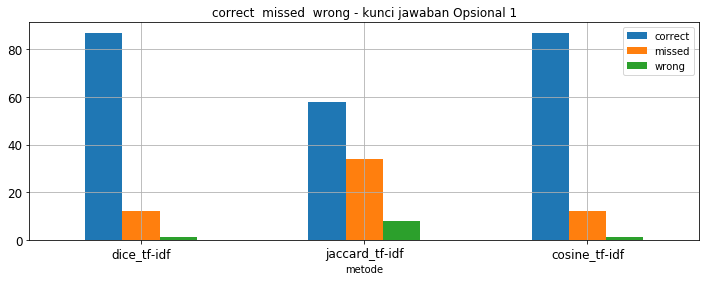

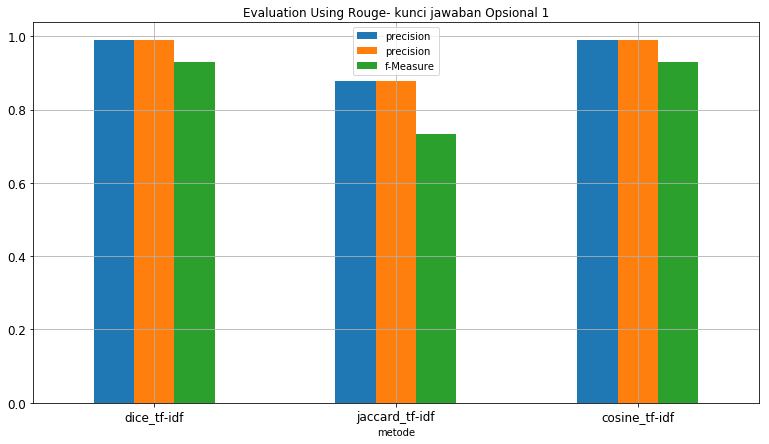

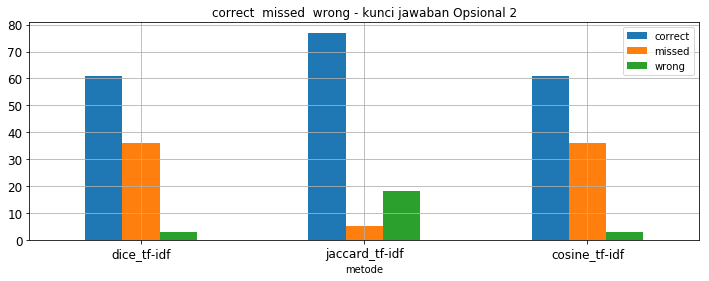

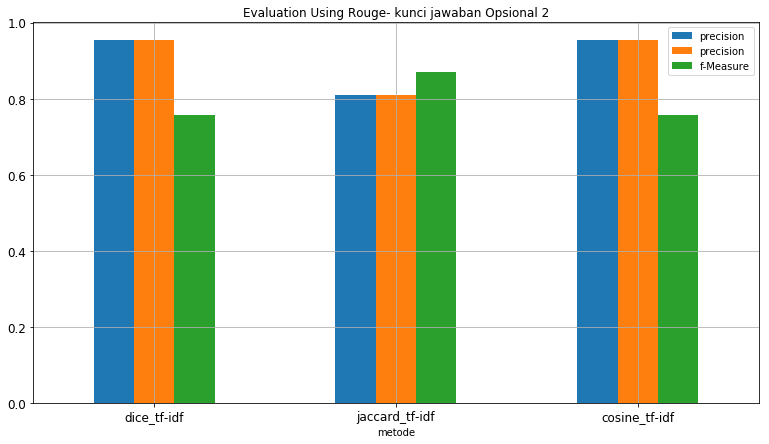

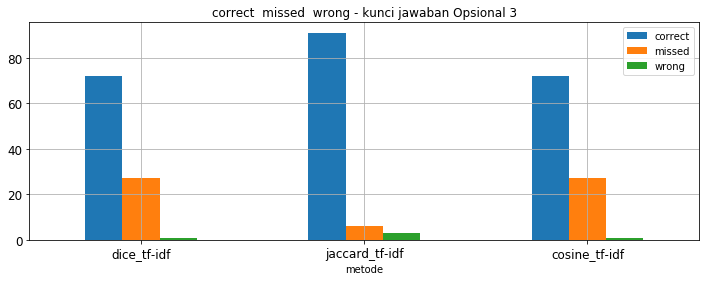

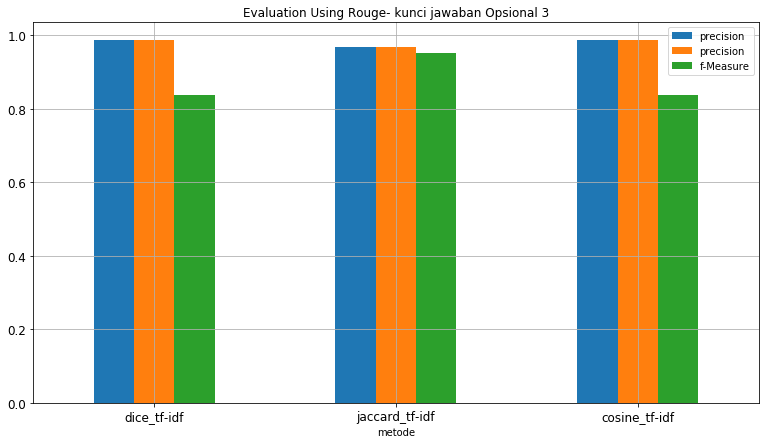

In [2]:

nama_file = ["ops_1.xlsx",
             "ops_2.xlsx",
             "ops_3.xlsx",  
            ]

path = ["hasil/hasil_similarity/ops1/",
        "hasil/hasil_similarity/ops2/",
        "hasil/hasil_similarity/ops3/"]

ops_ = ['Opsional 1',
        'Opsional 2',
        'Opsional 3',
        ]
ops_var = [ 'Opsi1',
            'Opsi2',
            'Opsi3',
        ]

for ix, nama in enumerate(ops_):
    pth = path[ix]+nama_file[ix]
    f = pd.read_excel(pth, sheet_name = 'Sheet1')
    f2 = pd.read_excel("data/jawaban_clean_jawaban buat label_1.xlsx", sheet_name = 'Sheet2')#hasil asli
    f2 = f2[:100]

    y_true = f2['Column4'].tolist()
    target_names = ['sangat mirip', 'mirip', 'tidak mirip','sangat tidak mirip']
    metode = list()
    precision = list()
    recall = list()
    f1_score = list()

    correctl = list()
    missedl = list()
    wrongl = list()

    for x,i in enumerate(list_data):  
        data = f[i].tolist()
        y_pred = data
        #print(len(y_pred))
        metode.append(i)
        data_tf = list()
        for a,b in zip(y_true,y_pred):
            data_tf.append(true_false (a, b))    
        correct = 0
        missed = 0
        wrong = 0
        for km in data_tf:
            if km == "correct":
                correct +=1
            elif km == "missed":
                missed +=1
            elif km =="wrong":
                wrong +=1
        #print("panjang data_tf ", len(data_tf))
        pres = correct/(correct+wrong)
        precision.append(pres)
        rec =  correct/(correct+missed)
        recall.append(rec)
        fm = 2*pres*(rec/(rec+pres))
        f1_score.append(fm)
    
        correctl.append(correct)
        missedl.append(missed)
        wrongl.append(wrong)

    dic3 = {
        "metode":metode ,
        "correct":correctl,
        "missed":missedl,
        "wrong":wrongl,
    }

    dic2 = {
        "metode":metode ,
        "precision":precision,
        "recall":recall,
        "f-Measure":f1_score,
    }
    df2 = pd.DataFrame.from_dict(dic2)
    df3 = pd.DataFrame.from_dict(dic3)
    
    vars()[ops_var[ix]+'_cwm'] = df3
    vars()[ops_var[ix]+'_rouge'] = df2
    #hasil tersimpan di -> hasil\pengujian -> lihat file paling terakhir
    #df2.to_excel('hasil\pengujian\hasil_pengujian_rouge'+waktu+'.xlsx')
   # print("Evaluation Using Rouge -",nama)
    #print(df3)
   # print(" ")
    #print("hasil evaluasi - "+nama)
    print(df3[:3].plot.bar( x='metode',y=['correct', 'missed','wrong'], rot=0, title='correct  missed  wrong - kunci jawaban '+nama, figsize=(12,4), fontsize=12, grid=True))
    #print(df2)
    print(df2[:3].plot.bar( x='metode',y=['precision', 'precision','f-Measure'], rot=0, title='Evaluation Using Rouge- kunci jawaban '+nama, figsize=(13,7), fontsize=12, grid=True))
   # print("~"*100)



           metode  precision    recall  f-Measure
0     dice_tf-idf   0.988636  0.878788   0.930481
1  jaccard_tf-idf   0.878788  0.630435   0.734177
2   cosine_tf-idf   0.988636  0.878788   0.930481

           metode  precision    recall  f-Measure
0     dice_tf-idf   0.953125  0.628866   0.757764
1  jaccard_tf-idf   0.810526  0.939024   0.870056
2   cosine_tf-idf   0.953125  0.628866   0.757764

           metode  precision    recall  f-Measure
0     dice_tf-idf   0.986301  0.727273   0.837209
1  jaccard_tf-idf   0.968085  0.938144   0.952880
2   cosine_tf-idf   0.986301  0.727273   0.837209


,cosine_precision,jaccard_precision,dice_precision,cosine_recall,jaccard_recall,dice_recall,cosine_f_Measure,jaccard_f_Measure,dice_f_Measure
Kunci Jawaban 1,0.988636,0.878788,0.988636,0.878788,0.630435,0.878788,0.930481,0.734177,0.930481
Kunci Jawaban 2,0.953125,0.810526,0.953125,0.628866,0.939024,0.628866,0.757764,0.870056,0.757764
Kunci Jawaban 3,0.986301,0.968085,0.986301,0.727273,0.938144,0.727273,0.837209,0.952880,0.837209


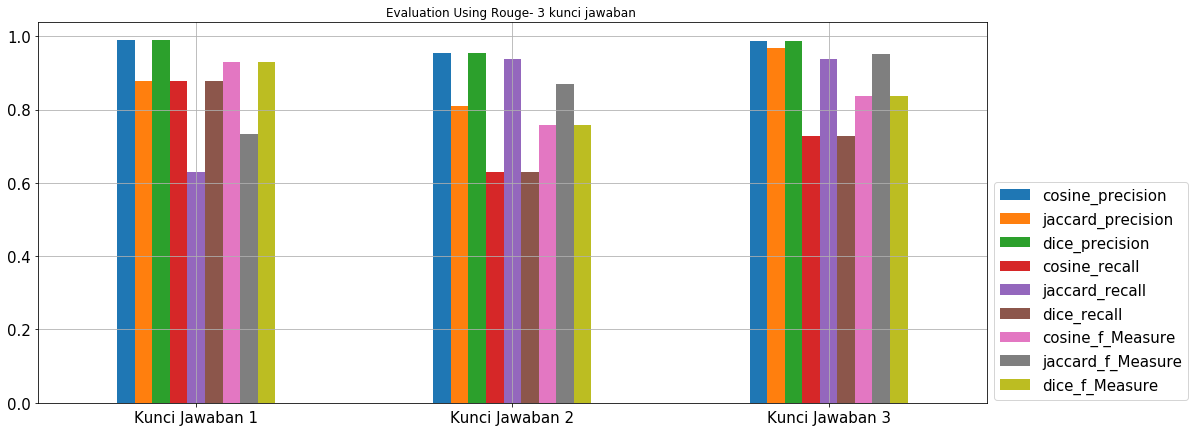

In [92]:
list_ops_hasil = ["Opsi1_rouge","Opsi2_rouge","Opsi3_rouge"]
metode = ["dice", "jaccard","cosine"]
param = ["precision","recall","f-Measure"]
ops__ = [
        'Kunci Jawaban 1',
        'Kunci Jawaban 2',
        'Kunci Jawaban 3',
        ]

for ix, i in enumerate(list_ops_hasil):
    dopsi = vars()[i][:3]
    print("")
    print(dopsi)
    

dice_precision  = list()
dice_recall  = list()
dice_f_Measure  = list()
jaccard_precision  = list()
jaccard_recall  = list()
jaccard_f_Measure  = list()
cosine_precision  = list()
cosine_recall  = list()
cosine_f_Measure  = list()

for i in range(3):
    if i == 0:
        dice_precision.append(Opsi1_rouge['precision'][i])
        dice_precision.append(Opsi2_rouge['precision'][i])
        dice_precision.append(Opsi3_rouge['precision'][i])
        
        dice_recall.append(Opsi1_rouge['recall'][i])
        dice_recall.append(Opsi2_rouge['recall'][i])
        dice_recall.append(Opsi3_rouge['recall'][i])
        
        dice_f_Measure.append(Opsi1_rouge['f-Measure'][i])
        dice_f_Measure.append(Opsi2_rouge['f-Measure'][i])
        dice_f_Measure.append(Opsi3_rouge['f-Measure'][i])

    elif i == 1:
        jaccard_precision.append(Opsi1_rouge['precision'][i])
        jaccard_precision.append(Opsi2_rouge['precision'][i])
        jaccard_precision.append(Opsi3_rouge['precision'][i])
        
        jaccard_recall.append(Opsi1_rouge['recall'][i])
        jaccard_recall.append(Opsi2_rouge['recall'][i])
        jaccard_recall.append(Opsi3_rouge['recall'][i])
        
        jaccard_f_Measure.append(Opsi1_rouge['f-Measure'][i])
        jaccard_f_Measure.append(Opsi2_rouge['f-Measure'][i])
        jaccard_f_Measure.append(Opsi3_rouge['f-Measure'][i])
        
    elif i == 2:
        
        cosine_precision.append(Opsi1_rouge['precision'][i])
        cosine_precision.append(Opsi2_rouge['precision'][i])
        cosine_precision.append(Opsi3_rouge['precision'][i])
        
        cosine_recall.append(Opsi1_rouge['recall'][i])
        cosine_recall.append(Opsi2_rouge['recall'][i])
        cosine_recall.append(Opsi3_rouge['recall'][i])
        
        cosine_f_Measure.append(Opsi1_rouge['f-Measure'][i])
        cosine_f_Measure.append(Opsi2_rouge['f-Measure'][i])
        cosine_f_Measure.append(Opsi3_rouge['f-Measure'][i])
dictt = {
    'cosine_precision' : cosine_precision,
    'jaccard_precision' : jaccard_precision,
    'dice_precision' : dice_precision,
    
    
    'cosine_recall' : cosine_recall,
    'jaccard_recall' : jaccard_recall,
    'dice_recall' : dice_recall,
    
    
    'cosine_f_Measure' : cosine_f_Measure,
    'jaccard_f_Measure' : jaccard_f_Measure,
    'dice_f_Measure' : dice_f_Measure,
    
    
}
index = [
        'cosine_precision',
        'jaccard_precision',
        'dice_precision',
         
         'cosine_recall',
        'jaccard_recall',
         'dice_recall',
         
        'cosine_f_Measure',
        'jaccard_f_Measure',
         'dice_f_Measure',        
]

df_gabungan = pd.DataFrame(dictt, index=ops__)

ax = df_gabungan.plot.bar(rot=0, title='Evaluation Using Rouge- 3 kunci jawaban ', 
                          figsize=(17,7), fontsize=15, grid=True)
ax.get_legend()
ax.legend(bbox_to_anchor=(1, 0.6), fontsize=15)
ax.get_legend()
df_gabungan
#df_gabungan

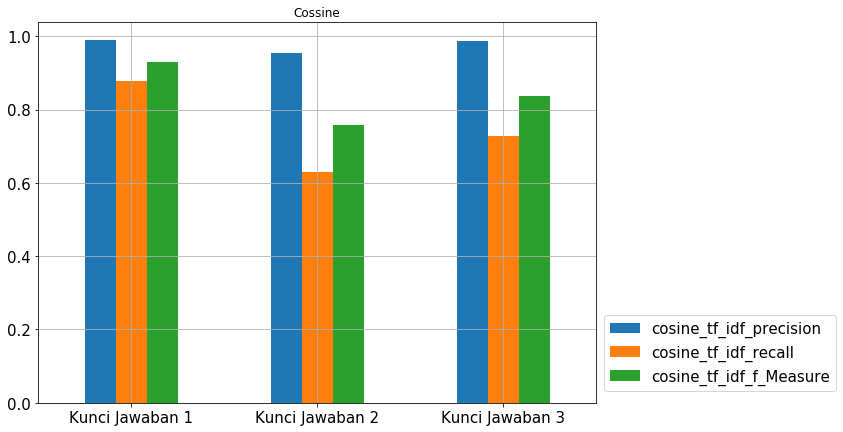

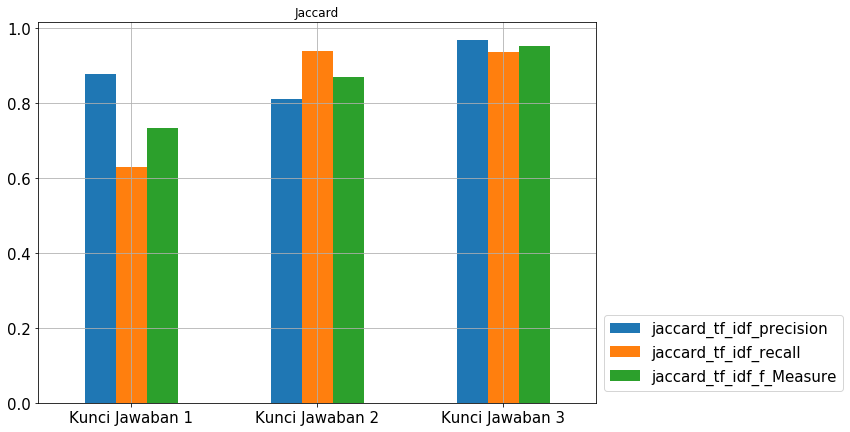

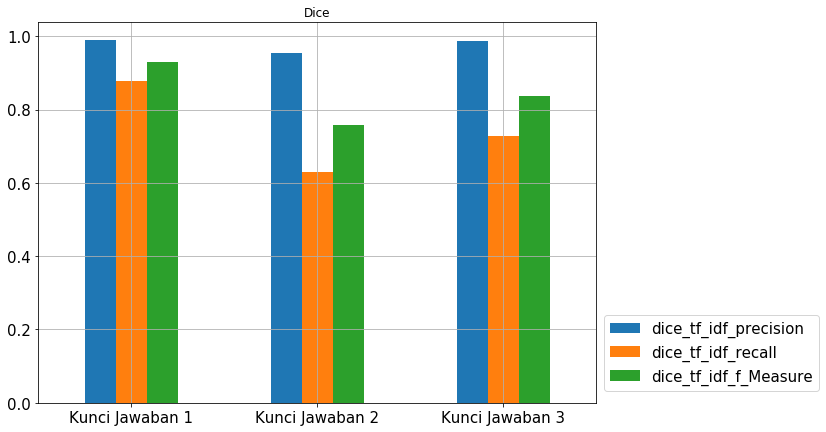

In [95]:
list_ops_hasil = ["Opsi1_rouge","Opsi2_rouge","Opsi3_rouge"]
metode = ["dice", "jaccard","cosine"]
param = ["precision","recall","f-Measure"]

dice_tf_idf_precision = [0,0,0]
jaccard_tf_idf_precision =[0,0,0]
cosine_tf_idf_precision = [0,0,0]

dice_tf_idf_recall = [0,0,0]
jaccard_tf_idf_recall =[0,0,0]
cosine_tf_idff_recall = [0,0,0]

dice_tf_idf_f_Measure = [0,0,0]
jaccard_tf_idf_f_Measure =[0,0,0]
cosine_tf_idf_f_Measure = [0,0,0]

dice_tf_idf_recall
for ix, i in enumerate(list_ops_hasil):
    vars()['dopsi'+str(ix)] = vars()[i][:3]
    #print(vars()['dopsi'+str(ix)])
    #print("")
dice_tf_idf_precision[0]=dopsi0['precision'].tolist()[0]
dice_tf_idf_precision[1]=dopsi1['precision'].tolist()[0]
dice_tf_idf_precision[2]=dopsi2['precision'].tolist()[0]

dice_tf_idf_recall[0]=dopsi0['recall'].tolist()[0]
dice_tf_idf_recall[1]=dopsi1['recall'].tolist()[0]
dice_tf_idf_recall[2]=dopsi2['recall'].tolist()[0]

dice_tf_idf_f_Measure[0]=dopsi0['f-Measure'].tolist()[0]
dice_tf_idf_f_Measure[1]=dopsi1['f-Measure'].tolist()[0]
dice_tf_idf_f_Measure[2]=dopsi2['f-Measure'].tolist()[0]

#
jaccard_tf_idf_precision[0]=dopsi0['precision'].tolist()[1]
jaccard_tf_idf_precision[1]=dopsi1['precision'].tolist()[1]
jaccard_tf_idf_precision[2]=dopsi2['precision'].tolist()[1]

jaccard_tf_idf_recall[0]=dopsi0['recall'].tolist()[1]
jaccard_tf_idf_recall[1]=dopsi1['recall'].tolist()[1]
jaccard_tf_idf_recall[2]=dopsi2['recall'].tolist()[1]

jaccard_tf_idf_f_Measure[0]=dopsi0['f-Measure'].tolist()[1]
jaccard_tf_idf_f_Measure[1]=dopsi1['f-Measure'].tolist()[1]
jaccard_tf_idf_f_Measure[2]=dopsi2['f-Measure'].tolist()[1]

#
cosine_tf_idf_precision[0]=dopsi0['precision'].tolist()[2]
cosine_tf_idf_precision[1]=dopsi1['precision'].tolist()[2]
cosine_tf_idf_precision[2]=dopsi2['precision'].tolist()[2]

cosine_tf_idf_recall[0]=dopsi0['recall'].tolist()[2]
cosine_tf_idf_recall[1]=dopsi1['recall'].tolist()[2]
cosine_tf_idf_recall[2]=dopsi2['recall'].tolist()[2]

cosine_tf_idf_f_Measure[0]=dopsi0['f-Measure'].tolist()[2]
cosine_tf_idf_f_Measure[1]=dopsi1['f-Measure'].tolist()[2]
cosine_tf_idf_f_Measure[2]=dopsi2['f-Measure'].tolist()[2]
#print(dopsi1['f-Measure'].tolist()[0])
cosine_tf_idf_f_Measure

#idxx = ops__
dice_tf_idf_dict = {
    "dice_tf_idf_precision":dice_tf_idf_precision,
    "dice_tf_idf_recall":dice_tf_idf_recall,
    "dice_tf_idf_f_Measure":dice_tf_idf_f_Measure 
}
df_dice = pd.DataFrame(dice_tf_idf_dict, index=ops__)
    
jaccard_tf_idf_dict = {
    "jaccard_tf_idf_precision":jaccard_tf_idf_precision,
    "jaccard_tf_idf_recall":jaccard_tf_idf_recall,
    "jaccard_tf_idf_f_Measure":jaccard_tf_idf_f_Measure 
}
df_jaccard = pd.DataFrame(jaccard_tf_idf_dict, index=ops__)


cosine_tf_idf_dict = {
    "cosine_tf_idf_precision":cosine_tf_idf_precision,
    "cosine_tf_idf_recall":cosine_tf_idf_recall,
    "cosine_tf_idf_f_Measure":cosine_tf_idf_f_Measure 
}
df_cosine = pd.DataFrame(cosine_tf_idf_dict, index=ops__)
metodee = ['df_cosine','df_jaccard','df_dice']
nama = ['Cossine',"Jaccard", 'Dice']
for ix, i in enumerate(metodee):
        ax = vars()[i].plot.bar(rot=0, title=nama[ix], figsize=(10,7), fontsize=15, grid=True)
        ax.get_legend()
        ax.legend(bbox_to_anchor=(1, 0.25), fontsize=15)
        ax.get_legend()